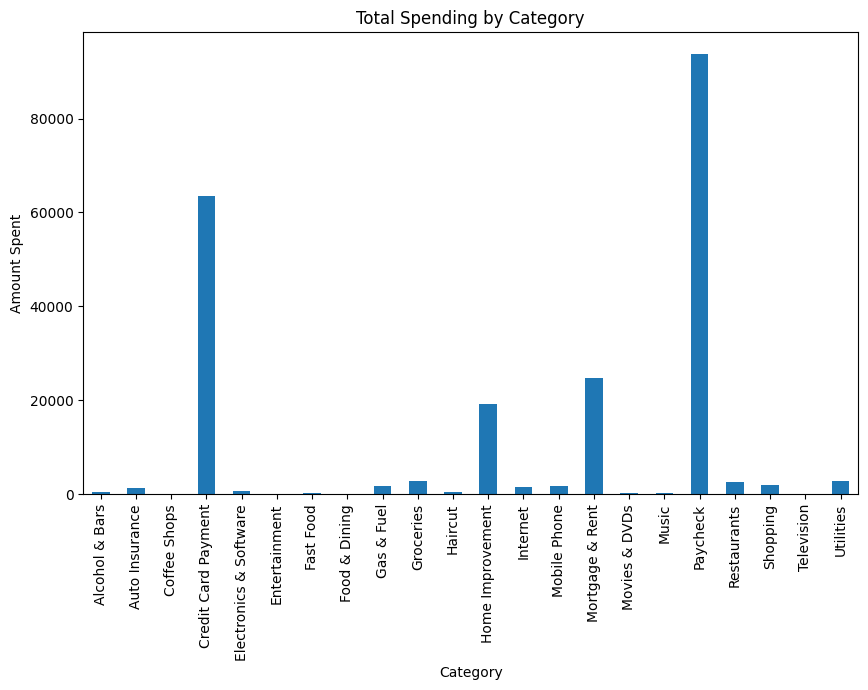

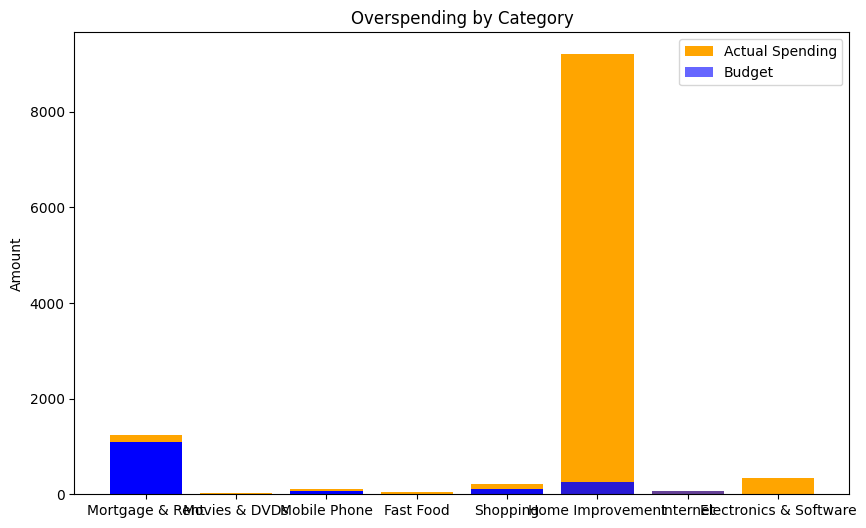

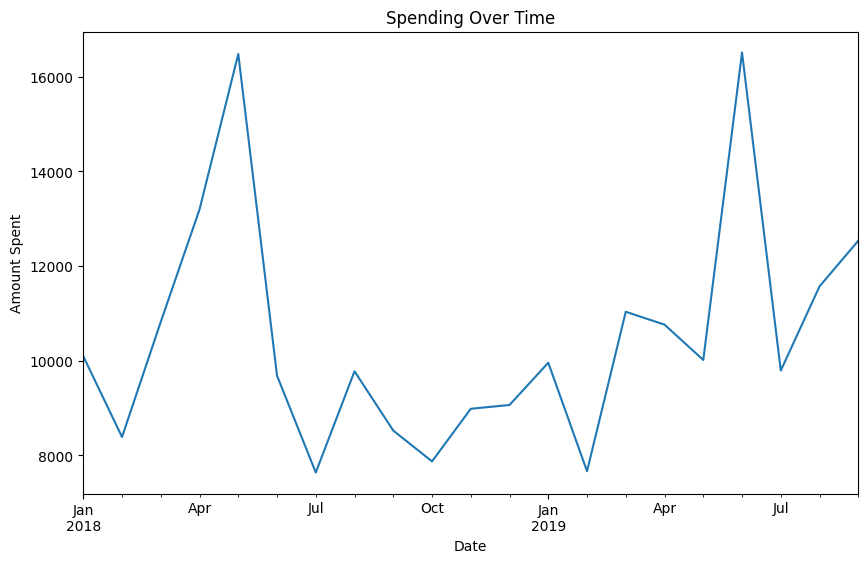

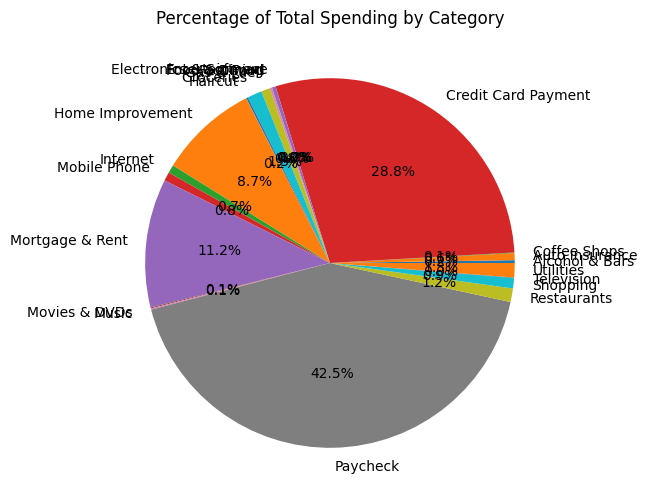

Linear Regression Metrics:
Mean Absolute Error: 97.57030591253836
Mean Squared Error: 35473.62073219665
R-squared Score: 0.8498694609926789

Random Forest Metrics:
Mean Absolute Error: 52.49524716626958
Mean Squared Error: 17670.148749935463
R-squared Score: 0.9252168540619372


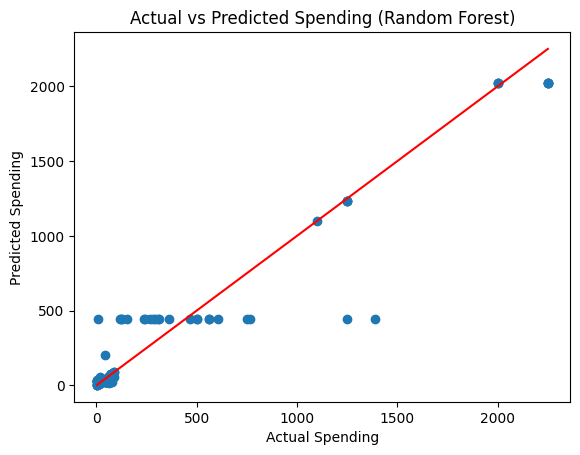

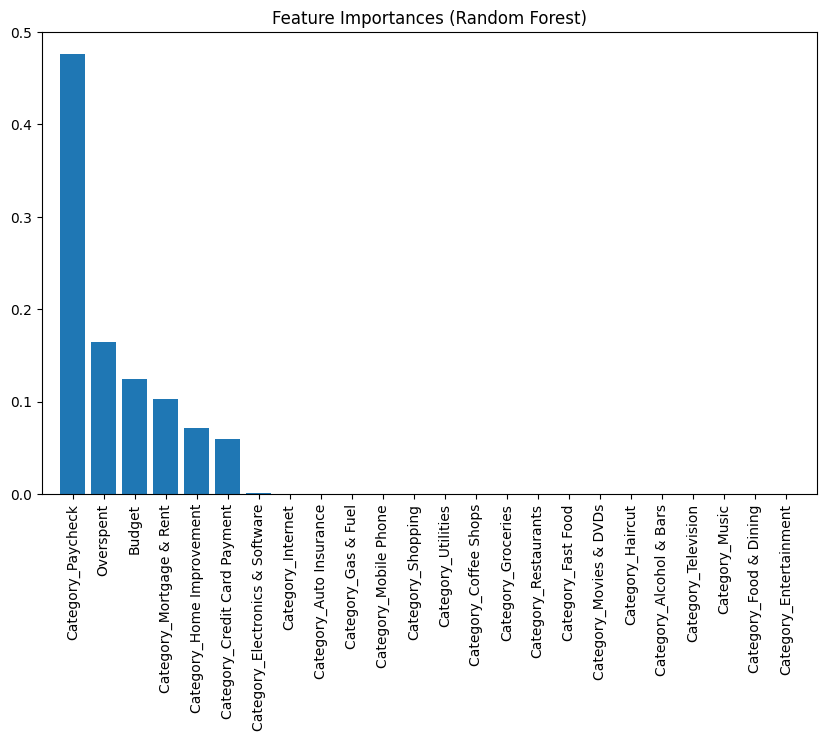

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the datasets
budget_df = pd.read_csv('Budget.csv')
transaction_df = pd.read_csv('personal_transactions.csv')

# Data Preprocessing
# Convert Date column to datetime
transaction_df['Date'] = pd.to_datetime(transaction_df['Date'], format='%m/%d/%Y')

# Handle missing values
transaction_df.ffill(inplace=True)

# Merge budget and transaction dataframes
merged_df = pd.merge(transaction_df, budget_df, on='Category', how='left')

# Create a new column to identify overspending
merged_df['Overspent'] = merged_df['Amount'] > merged_df['Budget']

# Data Visualization
# Total Spending by Category
merged_df.groupby('Category')['Amount'].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Total Spending by Category')
plt.ylabel('Amount Spent')
plt.show()

# Fill NaN values in Budget column
merged_df['Budget'].fillna(0, inplace=True)

# Overspending by Category
overspent = merged_df[merged_df['Overspent'] == True]
plt.figure(figsize=(10, 6))
plt.bar(overspent['Category'], overspent['Amount'], label='Actual Spending', color='orange')
plt.bar(overspent['Category'], overspent['Budget'], label='Budget', alpha=0.6, color='blue')
plt.title('Overspending by Category')
plt.ylabel('Amount')
plt.legend()
plt.show()

# Spending Over Time
transaction_df.set_index('Date', inplace=True)
monthly_spending = transaction_df.resample('M')['Amount'].sum()
monthly_spending.plot(kind='line', figsize=(10, 6))
plt.title('Spending Over Time')
plt.ylabel('Amount Spent')
plt.show()

# Percentage of Total Spending by Category
category_spending = transaction_df.groupby('Category')['Amount'].sum()
category_spending_percentage = (category_spending / category_spending.sum()) * 100
category_spending_percentage.plot(kind='pie', figsize=(10, 6), autopct='%1.1f%%')
plt.title('Percentage of Total Spending by Category')
plt.ylabel('')
plt.show()

# Feature Engineering
# One-hot encoding for the Category column
encoded_categories = pd.get_dummies(merged_df['Category'], prefix='Category')
merged_df = pd.concat([merged_df, encoded_categories], axis=1)
merged_df.drop('Category', axis=1, inplace=True)

# Define features (X) and target variable (y)
X = merged_df.drop(columns=['Date', 'Description', 'Transaction Type', 'Account Name', 'Amount'])
y = merged_df['Amount']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Calculate evaluation metrics for Linear Regression
print("Linear Regression Metrics:")
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_lr)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_lr)}')
print(f'R-squared Score: {r2_score(y_test, y_pred_lr)}')

# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
print("\nRandom Forest Metrics:")
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}')
print(f'R-squared Score: {r2_score(y_test, y_pred_rf)}')

# Visualize Actual vs Predicted Spending
plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Perfect fit line
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Actual vs Predicted Spending (Random Forest)')
plt.show()

# Feature Importance from Random Forest
feature_importances = rf_model.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Random Forest)')
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [3]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [4]:
print("Training feature names:", X.columns.tolist())


Training feature names: ['Budget', 'Overspent', 'Category_Alcohol & Bars', 'Category_Auto Insurance', 'Category_Coffee Shops', 'Category_Credit Card Payment', 'Category_Electronics & Software', 'Category_Entertainment', 'Category_Fast Food', 'Category_Food & Dining', 'Category_Gas & Fuel', 'Category_Groceries', 'Category_Haircut', 'Category_Home Improvement', 'Category_Internet', 'Category_Mobile Phone', 'Category_Mortgage & Rent', 'Category_Movies & DVDs', 'Category_Music', 'Category_Paycheck', 'Category_Restaurants', 'Category_Shopping', 'Category_Television', 'Category_Utilities']
